# Data Ingestion Pipelines

In [ ]:
import pandas as pd

#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False)
users = users.drop(users.index[0])

#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items = pd.read_csv('BX_Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False)
items = items.drop(items.index[0])

#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)
ratings = ratings.drop(ratings.index[0])

In [ ]:
users.info()

In [ ]:
users['age'] = users['age'].astype(float)

In [ ]:
items.head(5)

In [ ]:
# Take out images
items = items.drop(['img_s', 'img_m', 'img_l'], axis=1)

In [ ]:
items.head(5)

In [ ]:
ratings.head(5)

In [ ]:
# Join tables
aux = pd.merge(users, ratings, on='user_id', how='inner')
df_full = pd.merge(aux, items, on='isbn', how='inner')

In [ ]:
# Look table
df_full.head(5)

In [ ]:
#look for any missing values:
missing_values = df_full.isnull().sum()
missing_values

In [ ]:
#SEE THE DISTRIBUTION OF AGE TO DECIDE IF ITS BETTER TO REPLACE THE NA'S WITH MEAN OR MEDIAN
df_full["age"].median(skipna=True)

In [ ]:
df_full["age"] = df_full["age"].fillna(df_full["age"].median())

In [ ]:
#look for any missing values:
missing_values = df_full.isnull().sum()
missing_values

In [ ]:
age_counts = df_full.groupby('age').size().reset_index(name='count')
age_counts

In [ ]:
df_full['age'] = df_full['age'].apply(lambda x: df_full["age"].median() if x < 13 or x > 70 else x)

In [ ]:
age_counts_updated = df_full.groupby('age').size().reset_index(name='count')
age_counts_updated

In [ ]:
df_full[['city', 'state', 'country']] = df_full['location'].str.split(', ', n=2, expand=True)

In [ ]:
df_full.loc[df_full['isbn'] == '193169656X', 'publisher'] = 'Mundania Press LLC'
df_full.loc[df_full['isbn'] == '1931696993', 'publisher'] = 'Novelbooks Incorporated'

df_full.loc[df_full.isbn=='9627982032', 'book_author']='Larissa Anne Downe'
df_full.loc[df_full.isbn=='0751352497', 'book_author']='Dorling Kindersley'

In [ ]:
df_full.loc[df_full.book_author.isnull(),:]

In [ ]:
#look for any missing values:
missing_values = df_full.isnull().sum()
missing_values

In [ ]:
df_full = df_full.dropna()

In [ ]:
df_full = df_full.drop(columns=['location'])

In [ ]:
df_full.head(5)

In [ ]:
missing_values = df_full.isnull().sum()
missing_values

In [ ]:
country_counts = df_full.groupby('country').size().reset_index(name='count')
country_counts.sort_values(by='count', ascending=False)

In [ ]:
df_full['age'] = df_full['age'].astype(int)

In [ ]:
df_full['age'].describe().round()

In [ ]:
df_full['rating'] = df_full['rating'].astype(int)

In [ ]:
df_full.info()

In [ ]:
df_full.to_csv('df_full.csv', index=False)

# EDA

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Importing Data

In [69]:
df = pd.read_csv(r"C:\Users\alexn\Documents\Uni\semester 5\Recommendation Engines\Books_recommender\df_full.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006978 entries, 0 to 1006977
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              1006978 non-null  int64 
 1   age                  1006978 non-null  int64 
 2   isbn                 1006978 non-null  object
 3   rating               1006978 non-null  int64 
 4   book_title           1006978 non-null  object
 5   book_author          1006978 non-null  object
 6   year_of_publication  1006978 non-null  int64 
 7   publisher            1006978 non-null  object
 8   city                 992899 non-null   object
 9   state                984180 non-null   object
 10  country              995801 non-null   object
dtypes: int64(4), object(7)
memory usage: 84.5+ MB


In [4]:
df = df.drop(['city', 'state', 'country'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006978 entries, 0 to 1006977
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              1006978 non-null  int64 
 1   age                  1006978 non-null  int64 
 2   isbn                 1006978 non-null  object
 3   rating               1006978 non-null  int64 
 4   book_title           1006978 non-null  object
 5   book_author          1006978 non-null  object
 6   year_of_publication  1006978 non-null  int64 
 7   publisher            1006978 non-null  object
dtypes: int64(4), object(4)
memory usage: 61.5+ MB


In [71]:
# Convert all author names to lowercase to ensure consistency
df['book_author'] = df['book_author'].str.lower()

In [6]:
df.describe().round(2)

,user_id,age,rating,year_of_publication
count,1006978.00,1006978.00,1006978.00,1006978.00
mean,140555.29,36.46,2.83,1968.11
std,80559.62,9.93,3.85,231.42
min,2.00,13.00,0.00,0.00
25%,70403.50,31.00,0.00,1992.00
50%,141015.00,35.00,0.00,1997.00
75%,211426.00,41.00,7.00,2001.00
max,278854.00,70.00,10.00,2050.00


In [6]:
df.head()

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher
0,2,18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,35,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,8,35,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,8,35,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,8,35,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


## Basic Exploration

In [72]:
df_u = df.drop_duplicates(subset='isbn')
df_u.head()

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,city,state,country
0,2,18,0195153448,0,Classical Mythology,mark p. o. morford,2002,Oxford University Press,stockton,california,usa
1,8,35,0002005018,5,Clara Callan,richard bruce wright,2001,HarperFlamingo Canada,timmins,ontario,canada
2,8,35,0060973129,0,Decision in Normandy,carlo d'este,1991,HarperPerennial,timmins,ontario,canada
3,8,35,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,gina bari kolata,1999,Farrar Straus Giroux,timmins,ontario,canada
4,8,35,0393045218,0,The Mummies of Urumchi,e. j. w. barber,1999,W. W. Norton & Company,timmins,ontario,canada


In [10]:
df = df[df['year_of_publication'] != 0]

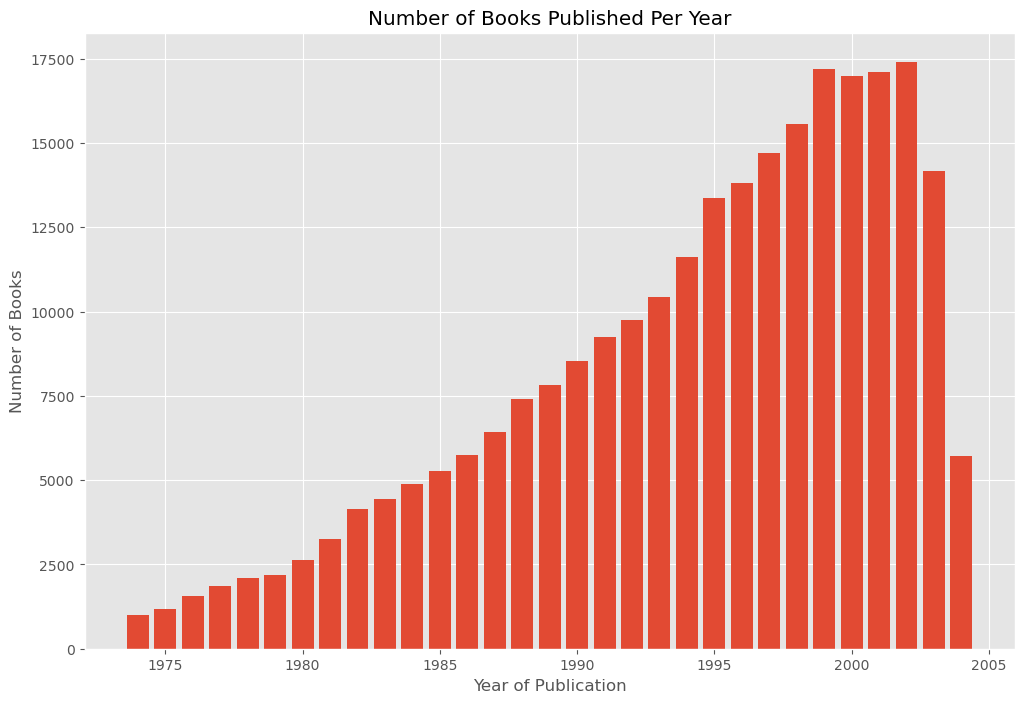

In [53]:
# books_per_year = df[(df['year_of_publication'] > 1700) & (df['year_of_publication'] < 2025)]['year_of_publication'].value_counts()
# books_per_year = books_per_year[books_per_year > 1000].sort_values(ascending = False)

books_per_year = df.groupby('year_of_publication')['isbn'].nunique()
years = books_per_year[books_per_year >= 1000].index
books_per_year = books_per_year[books_per_year.index.isin(years)]
books_per_year = books_per_year[(books_per_year.index >= 1974) & (books_per_year.index <= 2004)]

plt.figure(figsize=(12, 8))
plt.bar(books_per_year.index, books_per_year.values)  
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Per Year')
plt.show()

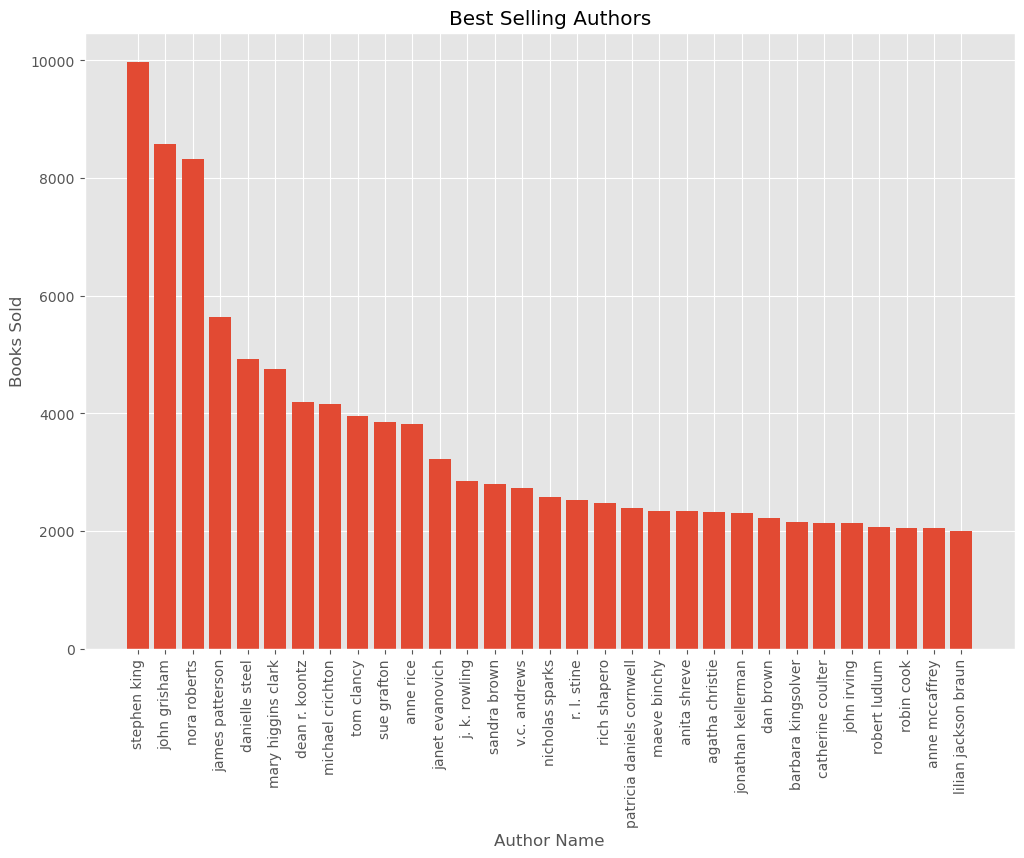

In [22]:
authors = df['book_author'].value_counts()
authors = authors[(authors.values >= 2000)]

plt.figure(figsize = (12,8))
plt.bar(authors.index, authors.values)
plt. title('Best Selling Authors')
plt.ylabel('Books Sold')
plt.xticks(rotation = 90)
plt.xlabel('Author Name')
plt.show()

In [33]:
stephen_king_books = df[df['book_author'] == 'stephen king']
# Display the book titles in Stephen King's catalog
stephen_king_books_titles = stephen_king_books['book_title'].unique()

# Show the titles
print("Stephen King's books:")
for i, title in enumerate(stephen_king_books_titles):
    print(f"{i+1}. {title}")


Stephen King's books:
1. The Girl Who Loved Tom Gordon
2. Pet Sematary
3. Thinner
4. The Dark Half
5. Mientras Escribo
6. The Shining
7. Dreamcatcher
8. The Dead Zone
9. Different Seasons
10. The Green Mile
11. The Tommyknockers
12. Hearts In Atlantis
13. The Girl Who Loved Tom Gordon : A Novel
14. Eyes of the Dragon
15. The Stand: Complete and Uncut
16. Dolores Claiborne
17. Stephen King's Danse Macabre
18. The Bachman Books: Rage, the Long Walk, Roadwork, the Running Man
19. From a Buick 8 : A Novel
20. On Writing
21. Everything's Eventual : 14 Dark Tales
22. Salem's Lot
23. It
24. Misery
25. Insomnia
26. Different Seasons M/TV
27. Atlantis.
28. The Stand (The Complete and Uncut Edition)
29. Desperation
30. Black House
31. Hearts In Atlantis : New Fiction
32. Christine
33. The Talisman
34. The Green Mile: The Complete Serial Novel
35. Bag of Bones
36. Firestarter (Signet Book)
37. Night Shift/Children of Corn
38. Firestarter
39. Gerald's Game
40. Rose Madder
41. Cujo
42. The Two Dead

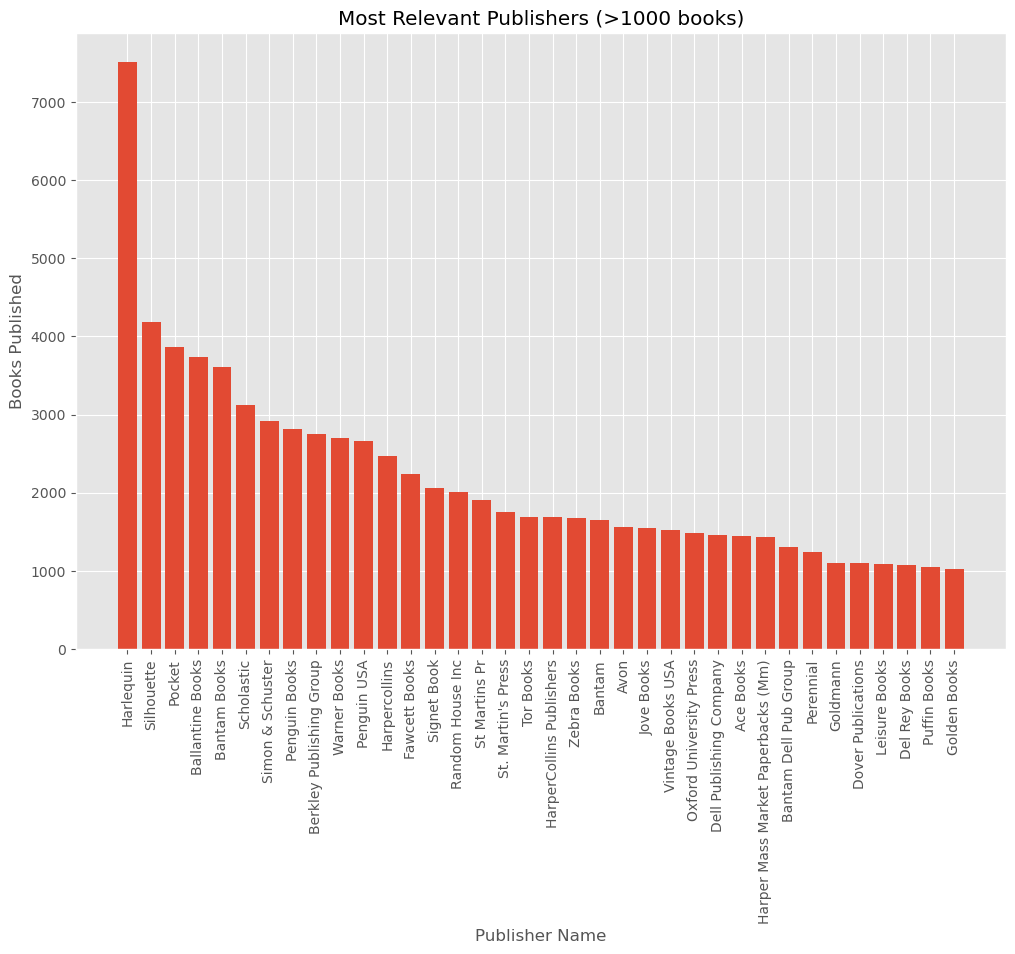

In [50]:
publisher = df_u['publisher'].value_counts()
publisher = publisher[publisher.values > 1000]
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(publisher.index, publisher.values)
plt.title('Most Relevant Publishers (>1000 books)')
plt.ylabel('Books Published')
plt.xlabel('Publisher Name')
plt.show()

## Ratings

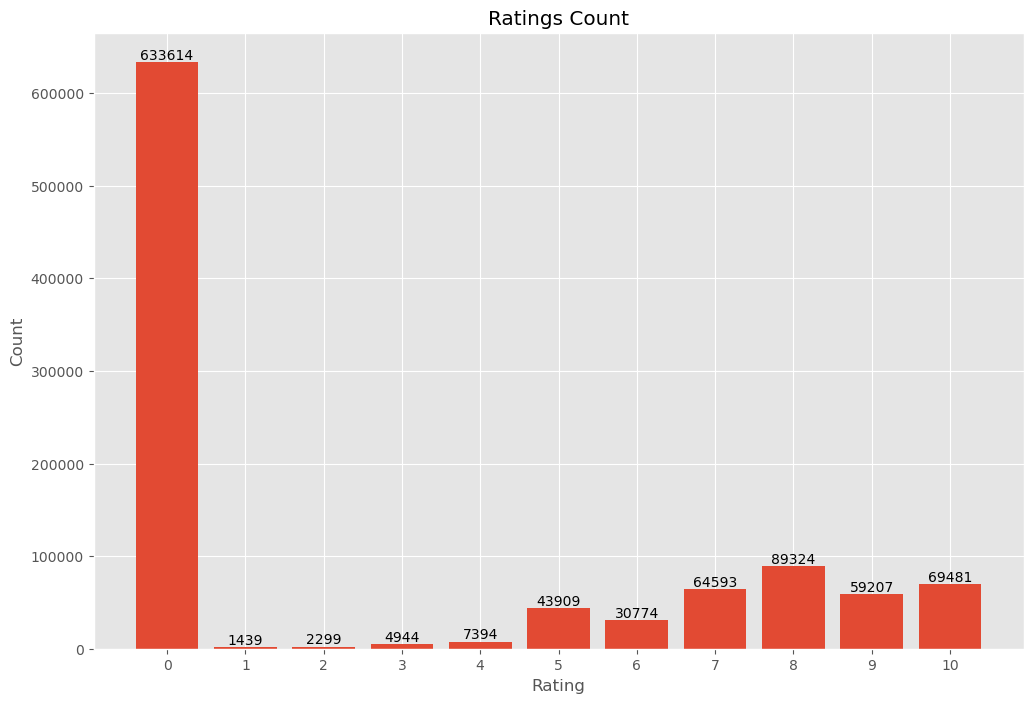

In [57]:
count_ratings = df['rating'].value_counts()
# neutral_colors = [
#     "#8B8B7A",  # Olive Green
#     "#6B8E23",  # Olive Drab
#     "#A9A9A9",  # Dark Gray
#     "#BDB76B",  # Dark Khaki
#     "#C8C8C8",  # Light Gray
#     "#A52A2A",  # Brown (Maroon-like)
#     "#708090",  # Slate Gray
#     "#556B2F",  # Dark Olive Green
#     "#5F9EA0",  # Cadet Blue
#     "#D2B48C"   # Tan
# ]

plt.figure(figsize = (12,8))
bars = plt.bar(count_ratings.index, count_ratings.values)
for bar in bars:
    yval = bar.get_height()  # Get the height (count) of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Position the text slightly above the bar
             str(int(yval)), ha='center', va='bottom', fontsize=10)
plt.xticks(ticks=count_ratings.index, labels= count_ratings.index)
plt.title('Ratings Count')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

We see that we have a lot of users that have bought a book, but have not actually left a review. 

For the non-personalized recommender this won't be a problem, as we will base the recommendations on popularity (how often they were purchased) and not on how well each book was rated.

For the collaborative filtering recommender this will create the problem of having a very sparse matrix some things we might want to do:
Here are the detailed explanations of each technique:

### 1. **Leveraging Implicit Feedback like Purchases and Clicks**
   - **Explanation**: In collaborative filtering, implicit feedback refers to data points that suggest user preferences without explicitly asking for ratings. For example, purchases, clicks, views, time spent on an item, or even adding an item to a cart can all be considered implicit feedback. 
   - **How it's done**: Instead of relying solely on user-provided ratings or reviews, you can track actions that indicate interest in an item, such as buying a book or clicking on its page. These interactions can be treated as positive feedback. For example, a purchase can be treated as an implicit "like" or preference. The absence of an action (like not buying) can be seen as neutral or negative feedback. This approach is particularly useful when users leave little or no reviews.

### 2. **Using Matrix Factorization with Regularization to Handle Missing Values**
   - **Explanation**: Matrix factorization techniques, such as Singular Value Decomposition (SVD) or Alternating Least Squares (ALS), decompose the user-item interaction matrix into lower-dimensional matrices that approximate missing values. However, when the matrix is sparse (many missing ratings), it can lead to overfitting or biased predictions. **Regularization** is a technique that helps prevent overfitting by penalizing overly complex models.
   - **How it's done**: In matrix factorization, the user-item matrix is approximated by two smaller matrices (one for users and one for items). The model learns latent factors that explain the interaction between users and items. Regularization adds a penalty term to the loss function to discourage the model from fitting to the noise in the data or from creating overly complex latent features. This process helps to make the model more robust when there are many missing values.

### 3. **Employing Item-Based Collaborative Filtering**
   - **Explanation**: Item-based collaborative filtering focuses on the similarity between items rather than between users. Instead of finding similar users and recommending items they liked, it finds items that are similar to what the user has interacted with and recommends those. This approach can work better when users have a sparse rating history, as similarities can be drawn between items rather than users.
   - **How it's done**: The key idea is to calculate item-item similarities based on user interaction data (e.g., shared users between items). For instance, if users who bought Book A also bought Book B, then Books A and B are considered similar. When a user interacts with an item, the system recommends other items that are most similar to it based on past user behavior.

### 4. **Creating a Hybrid System Combining Collaborative and Content-Based Approaches**
   - **Explanation**: A hybrid recommender combines the strengths of both **collaborative filtering** (which is based on user interactions) and **content-based filtering** (which recommends items based on their features, such as genre, author, or description). The idea is to use collaborative filtering for users with sufficient data and switch to content-based methods for users with sparse data.
   - **How it's done**: In a hybrid system, collaborative filtering might be used to recommend items based on user similarity or item similarity, while content-based filtering might recommend items based on their attributes when user behavior data is insufficient. This hybrid approach can be implemented in different ways, such as by blending the recommendations from both models, or by switching between the models based on certain conditions (e.g., user has few interactions).

### 5. **Applying User Clustering or Popularity-Based Approaches for Users with Sparse Data**
   - **Explanation**: When a user has sparse data (e.g., few ratings or interactions), clustering techniques can be applied to group users with similar characteristics. **Popularity-based recommendations** are another fallback strategy, where items that are popular across all users are recommended, regardless of user-specific behavior.
   - **How it's done**:
     - **User Clustering**: Users can be clustered based on demographic information (age, location) or behavioral patterns (purchasing habits). After clustering, recommendations can be made by identifying which items are popular within the user’s cluster.
     - **Popularity-Based**: For users with few ratings or interactions, recommending the most popular items (e.g., most bought or most viewed) is a safe fallback strategy. This approach doesn't rely on user preferences and ensures that the user is still given relevant recommendations even with sparse data.


## Will a non-personalized populariy recommender be a good choice?

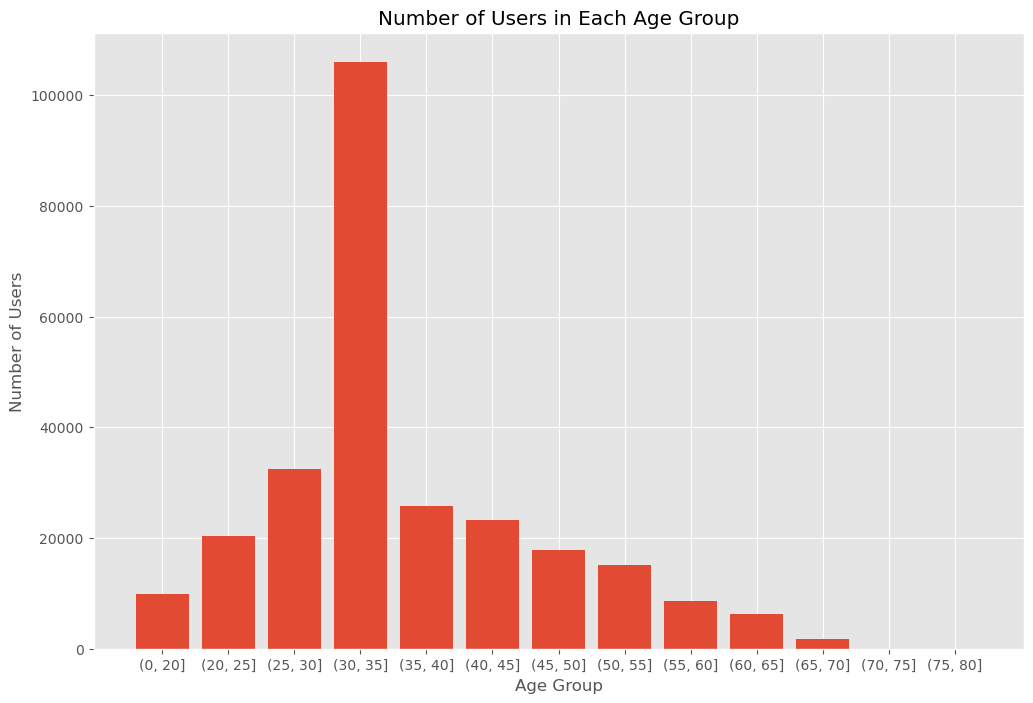

In [62]:
age_groups = pd.cut(df_u['age'], bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

counts_age = df_u.groupby(age_groups).size()

counts_age.index = counts_age.index.astype(str)

plt.figure(figsize=(12,8))
plt.bar(counts_age.index, counts_age.values)

plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each Age Group')

plt.show()

In [63]:
sum(counts_age.values)

267409

Most of the buyers are around 30 to 35 years. This is clearly the dominating age for amazon's book customers. Surprisingly enough there still quite a few buyers in their 20s, eventhough younger people are considered to be less acitve readers. This will definetly affect the popularity of each book.

In [11]:
young_people = df[(df['age']>15) & (df['age']<30)]
young_people.head()

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher
0,2,18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
21,10,26,1841721522,0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters & Small Ltd
36,20,19,0425163091,0,Chocolate Jesus,Stephan Jaramillo,1998,Berkley Publishing Group
47,36,24,067176537X,0,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside
51,42,17,0553582747,7,From the Corner of His Eye,Dean Koontz,2001,Bantam Books


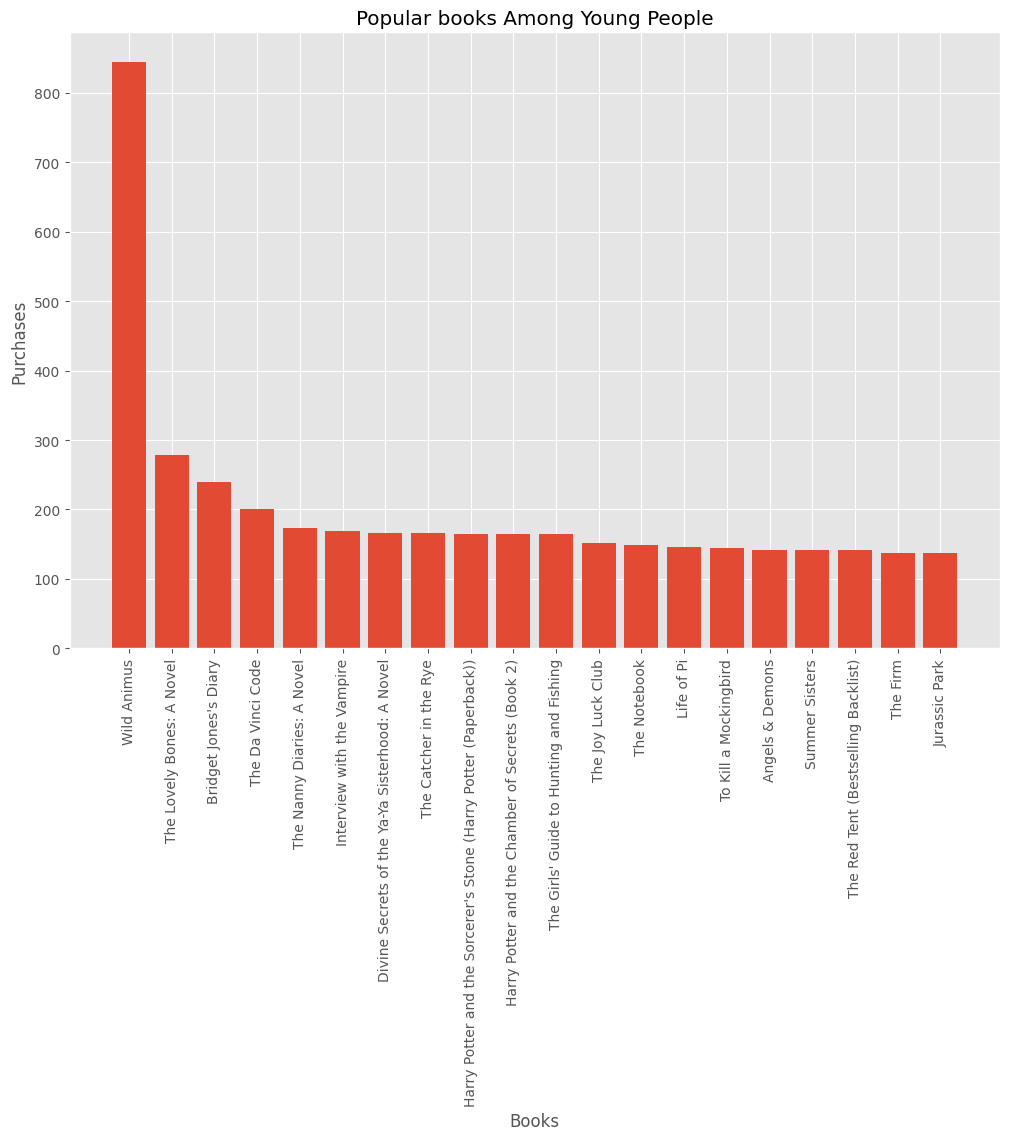

In [20]:
pop_books = young_people['book_title'].value_counts()
pop_books = pop_books.sort_values(ascending = False)[0:20]
plt.figure(figsize = (12,8))
plt.xticks(rotation= 90)
plt.bar(pop_books.index, pop_books.values)
plt.title('Popular books Among Young People')
plt.xlabel('Books')
plt.ylabel('Purchases')
plt.show()

"The Catcher in the rye" is a rather popular book among academic settings which might be the reason why it is more populaer among young people. Other popular books are very well known novels that have been popular for many years now. Let's compare with another age group.

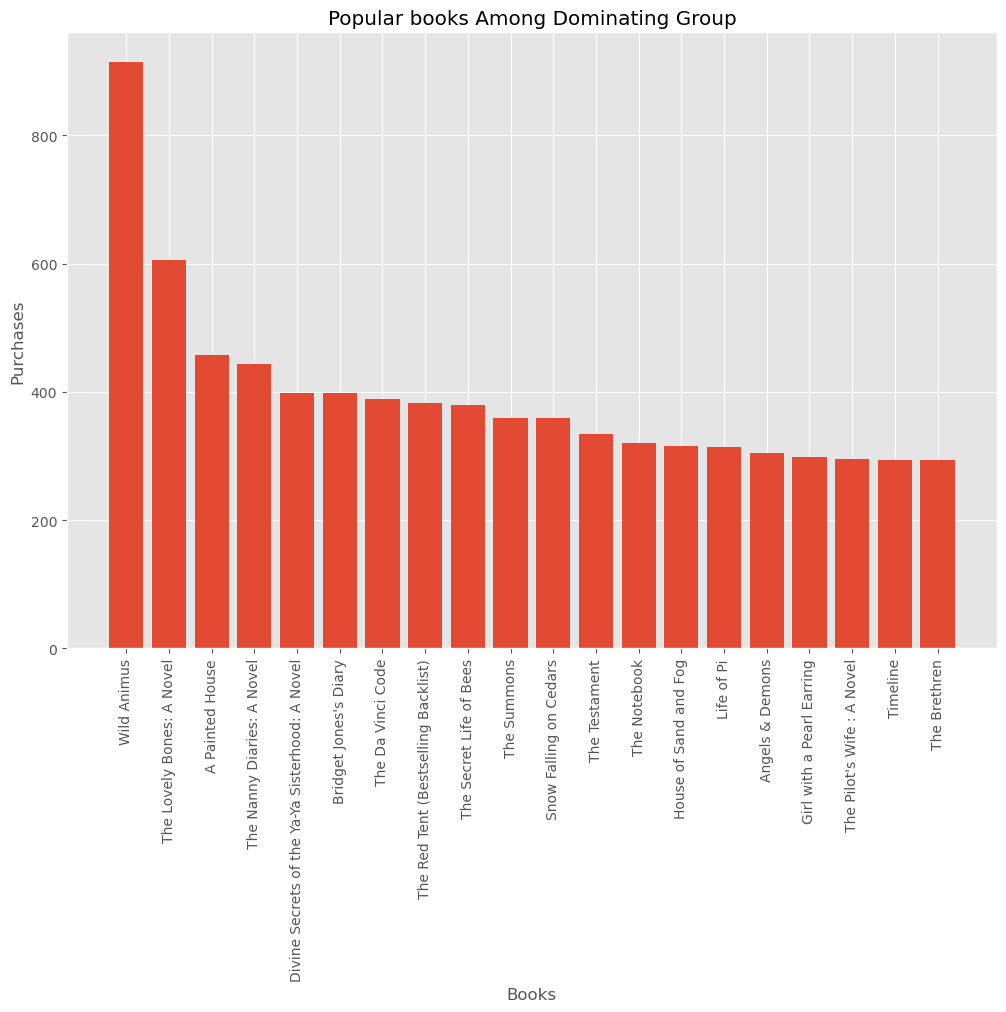

In [66]:
young_people = df[(df['age']>30) & (df['age']<40)]
young_people.head()
pop_books = young_people['book_title'].value_counts()
pop_books = pop_books.sort_values(ascending = False)[0:20]
plt.figure(figsize = (12,8))
plt.xticks(rotation= 90)
plt.bar(pop_books.index, pop_books.values)
plt.title('Popular books Among Dominating Group')
plt.xlabel('Books')
plt.ylabel('Purchases')
plt.show()

there are several books that are the same, most importantly the two most popular are the same. Howvere, for example the catcher in the rye is no longer there (no longer academic), and some of the more juvenile novels do not appear either. let's look at the older age groups.

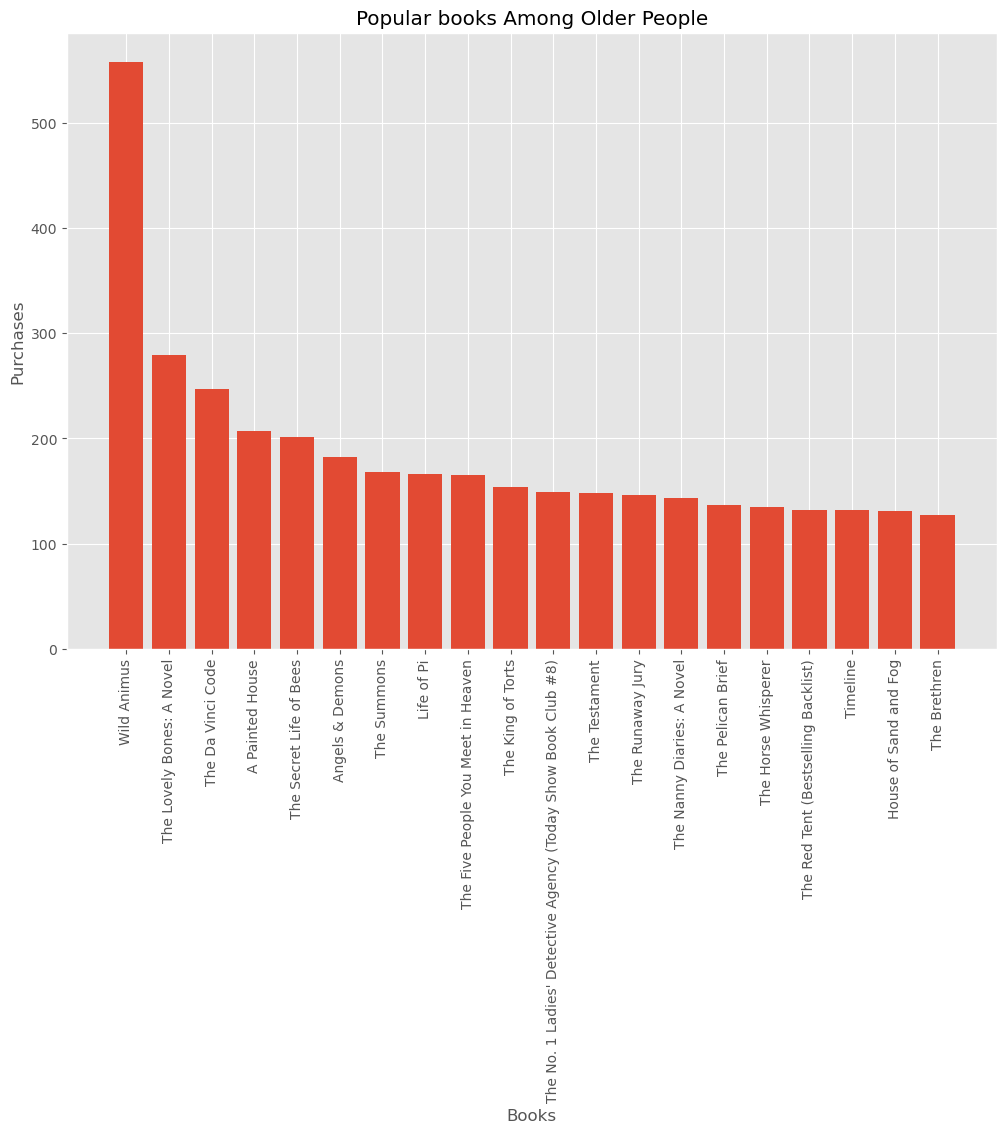

In [65]:
young_people = df[(df['age']>40) & (df['age']<80)]
young_people.head()
pop_books = young_people['book_title'].value_counts()
pop_books = pop_books.sort_values(ascending = False)[0:20]
plt.figure(figsize = (12,8))
plt.xticks(rotation= 90)
plt.bar(pop_books.index, pop_books.values)
plt.title('Popular books Among Older People')
plt.xlabel('Books')
plt.ylabel('Purchases')
plt.show()

Once again we see a very similar pattern. This is very good news for us, as it seems that popularity is relativly consistent across all age groups, which means that there is a good user for our non-personalized recommender to be based on popularity 

## Where are most of the users from? Is it a good idea to use location as a context for a recommender?

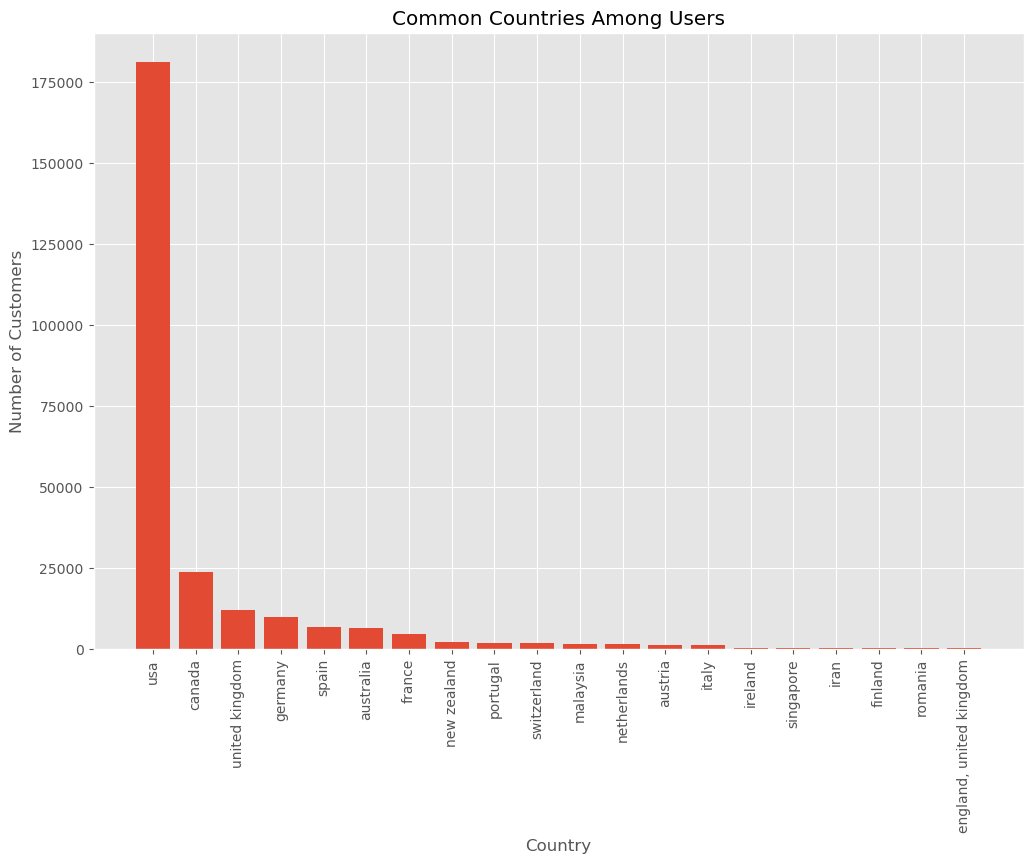

In [74]:
df = df_u.fillna(0)
country = df_u[df_u['country'] != 0]
country = country['country'].value_counts()
country = country.sort_values(ascending = False)[0:20]
plt.figure(figsize = (12,8))
plt.xticks(rotation= 90)
plt.bar(country.index, country.values)
plt.title('Common Countries Among Users')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

From what we can see most users are from USA. From this information we can assume that using country as a context is going to be uneffecitve as there are countries with less then a 1000 customers. Doing collaborative filtering pero country wouldn't give us any valuable information due to the lack of purchases, and viceversa for the usa. It is there for, considering that 75% of our users are from the us a recommender that also uses country as a context variable is rather useless. Therefore we will do a collaborative filtering of the entire dataset.

## Best Rated books
### Books upwards of 50 ratings

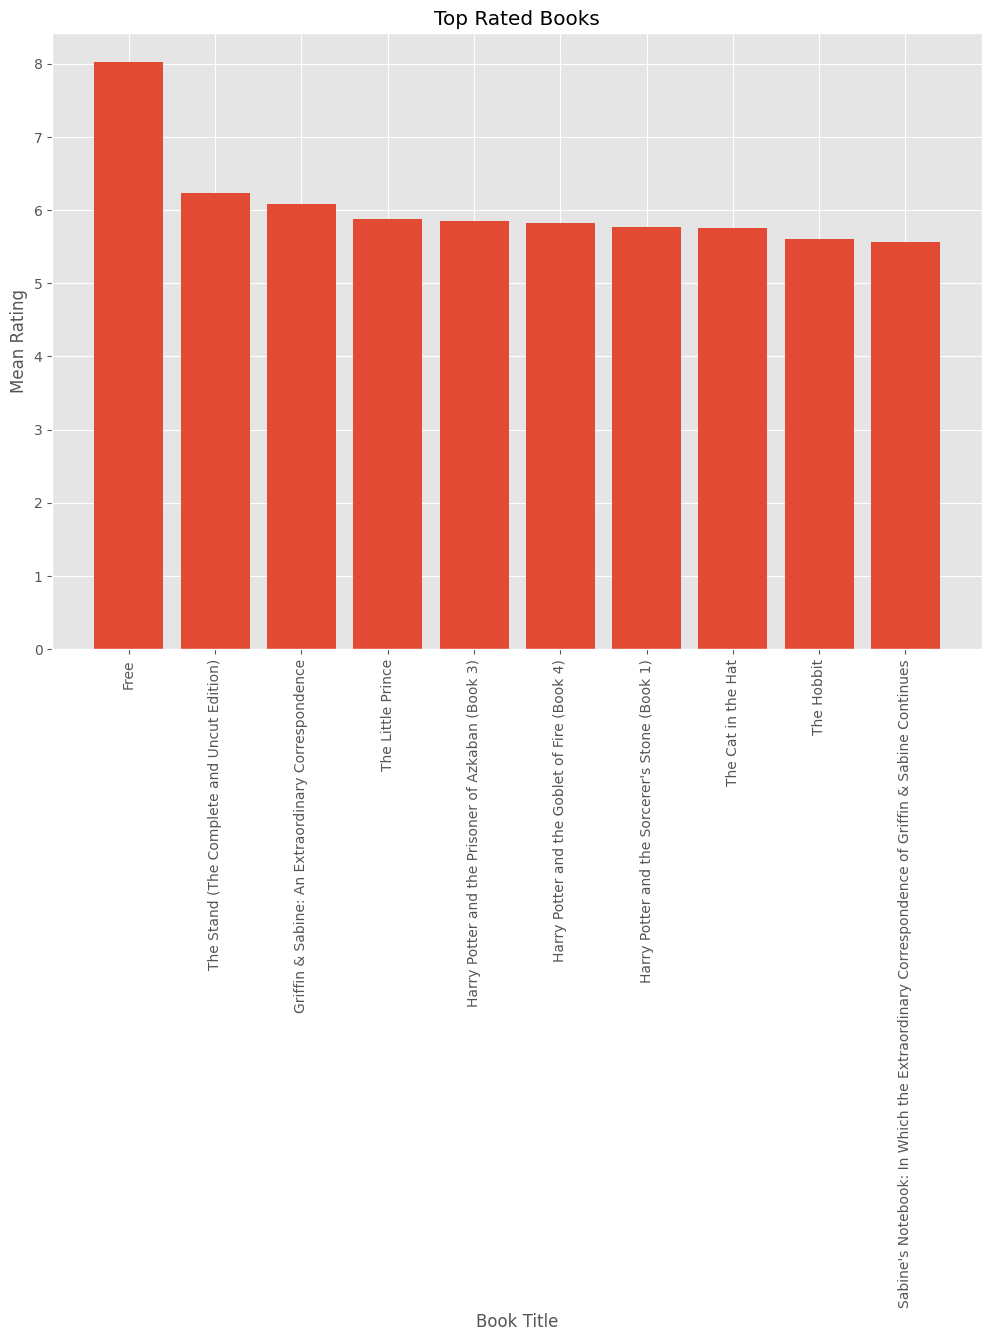

In [20]:
# First, filter the books that have at least 50 ratings
book_counts = df['book_title'].value_counts()
books_with_min_ratings = book_counts[book_counts >= 50].index
top_books = df[df['book_title'].isin(books_with_min_ratings)] \
    .groupby('book_title')['rating'] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10)

plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(top_books.index, top_books.values)
plt.title("Top Rated Books")
plt.ylabel("Mean Rating")
plt.xlabel("Book Title")
plt.show()

## Mean rating per year
### Upwards of 1k books published

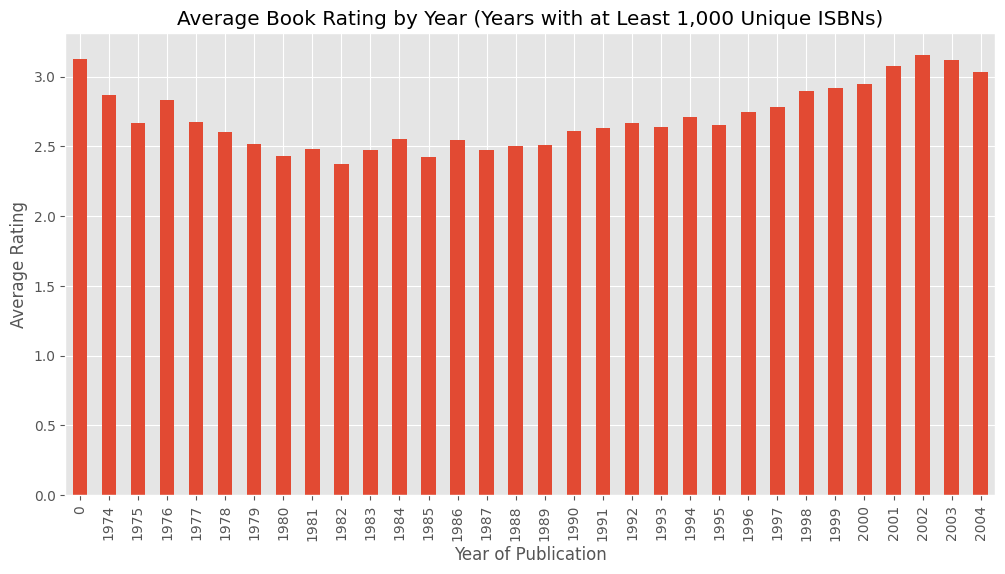

In [23]:
import matplotlib.pyplot as plt

# Step 1: Count the number of unique ISBNs per year
isbn_counts_per_year = df.groupby('year_of_publication')['isbn'].nunique()

# Step 2: Filter to include only years where at least 1,000 unique ISBNs were published
years_with_min_isbns = isbn_counts_per_year[isbn_counts_per_year >= 1000].index

# Step 3: Filter the original dataframe to include only these years
filtered_df = df[df['year_of_publication'].isin(years_with_min_isbns)]

# Step 4: Group by 'year_of_publication' and calculate the mean rating
yearly_avg_ratings = filtered_df.groupby('year_of_publication')['rating'].mean()

# Step 5: Plot the results
yearly_avg_ratings.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Year of Publication")
plt.ylabel("Average Rating")
plt.title("Average Book Rating by Year (Years with at Least 1,000 Unique ISBNs)")
plt.show()


No significant difference nor evolution. We can however clearly see that only 1970 onwards there are more than 1k books published. Lets explore the evolution. We made sure to only sum unique isbns.

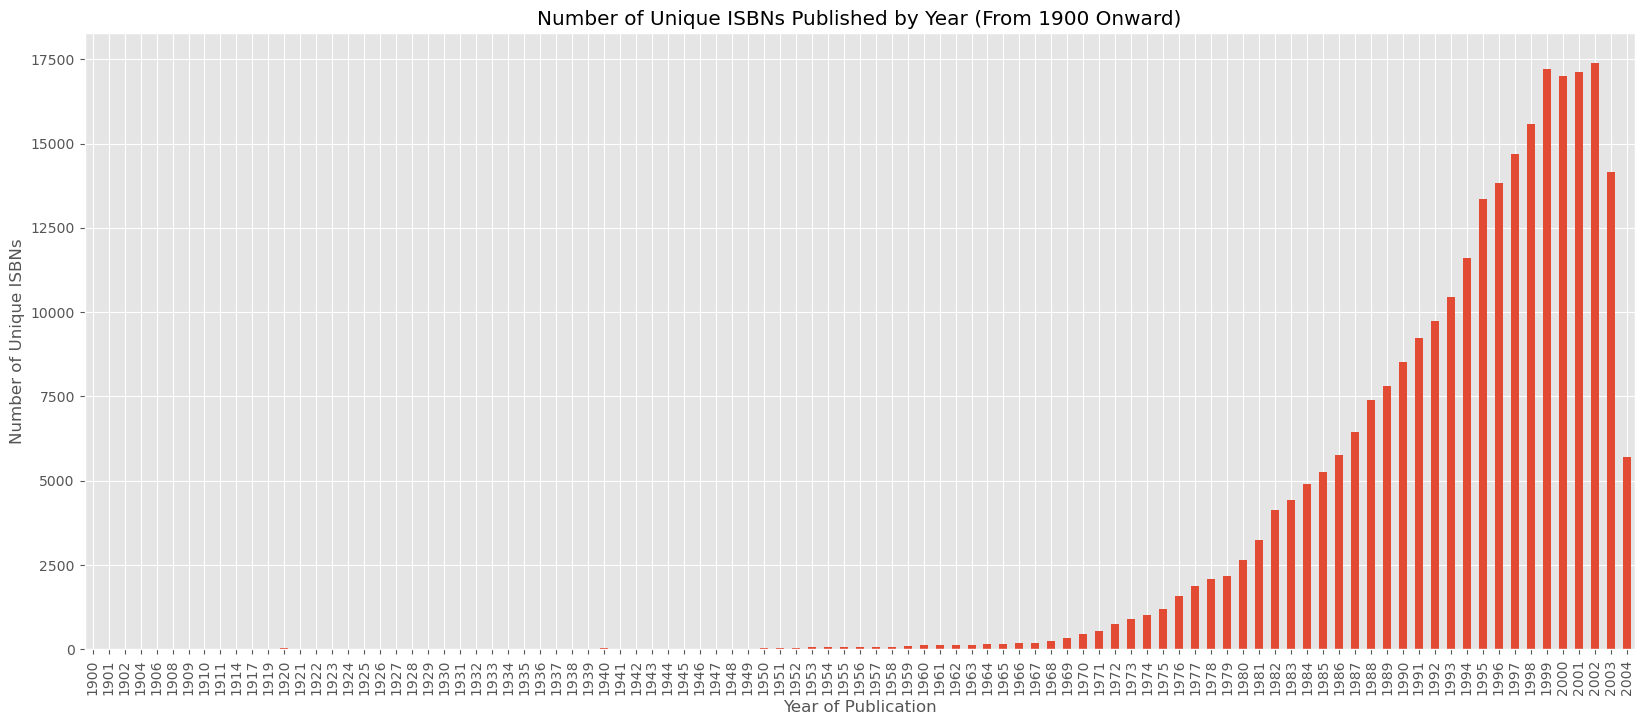

In [54]:
isbn_counts_per_year = df.groupby('year_of_publication')['isbn'].nunique()

isbn_counts_since_1000 = isbn_counts_per_year[(isbn_counts_per_year.index >= 1900) & (isbn_counts_per_year.index <= 2004)]

isbn_counts_since_1000.plot(kind='bar', figsize=(20, 8))
plt.xlabel("Year of Publication")
plt.ylabel("Number of Unique ISBNs")
plt.title("Number of Unique ISBNs Published by Year (From 1900 Onward)")
plt.xticks(rotation=90)  
plt.show()